In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'time', 'DEATH_EVENT'])
print(df)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

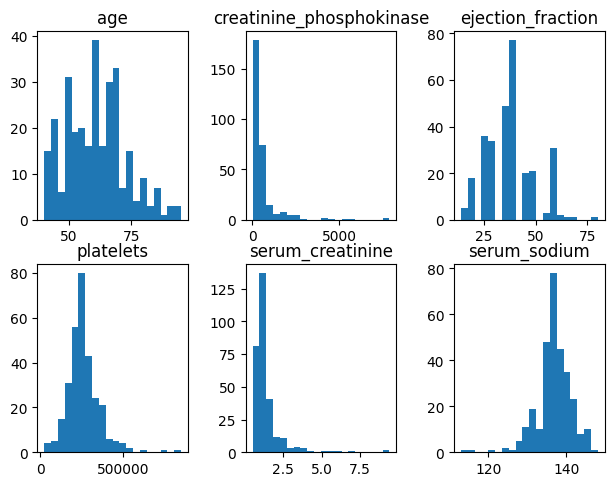

In [2]:
import matplotlib.pyplot as plt

n_bins = 20

fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(df['age'].values, bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(df['ejection_fraction'].values, bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(df['platelets'].values, bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(df['serum_creatinine'].values, bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(df['serum_sodium'].values, bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [5]:
def print_range_average(column_name: str) -> str:
    column_range = min(df[column_name].values), max(df[column_name].values)
    column_average_value = df[column_name].mode()[0]

    return f'Для {column_name} - {column_range}, max наблюдений: ~ {column_average_value}'


for i in df.columns:
    print(print_range_average(i))

Для age - (40.0, 95.0), max наблюдений: ~ 60.0
Для creatinine_phosphokinase - (23, 7861), max наблюдений: ~ 582
Для ejection_fraction - (14, 80), max наблюдений: ~ 35
Для platelets - (25100.0, 850000.0), max наблюдений: ~ 263358.03
Для serum_creatinine - (0.5, 9.4), max наблюдений: ~ 1.0
Для serum_sodium - (113, 148), max наблюдений: ~ 136


In [6]:
data = df.to_numpy(dtype='float')

In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[:150, :])
data_scaled = scaler.transform(data)

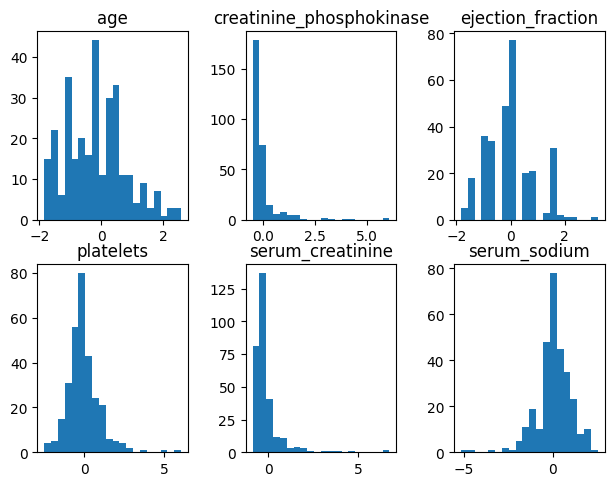

In [8]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(data_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [10]:
dictionary_get = {'age': 0, 'creatinine_phosphokinase': 1, 'ejection_fraction': 2, 'platelets': 3,
                  'serum_creatinine': 4, 'serum_sodium': 5}


def mathematical_expectation(column_name: str) -> None:
    first_df_mathematical_expectation = np.mean(df[column_name])
    second_df_mathematical_expectation = np.mean(data_scaled[:, dictionary_get[column_name]])

    first_df_standard_deviation = np.std(df[column_name])
    second_df_standard_deviation = np.std(data_scaled[:, dictionary_get[column_name]])
    print(
        f'Мат. ожидание "{column_name}" до стандартизации: {first_df_mathematical_expectation}, после: {second_df_mathematical_expectation}')
    print(
        f'СКО "{column_name}" до стандартизации: {first_df_standard_deviation}, после: {second_df_standard_deviation}')
    print()
    print('-----------------------------------')
    print()

for i in df.columns:
    mathematical_expectation(i)

Мат. ожидание "age" до стандартизации: 60.83389297658862, после: -0.16970362369106984
СКО "age" до стандартизации: 11.874901429842655, после: 0.9538237876978354

-----------------------------------

Мат. ожидание "creatinine_phosphokinase" до стандартизации: 581.8394648829432, после: -0.021276750290383013
СКО "creatinine_phosphokinase" до стандартизации: 968.6639668032415, после: 0.8141790488228113

-----------------------------------

Мат. ожидание "ejection_fraction" до стандартизации: 38.08361204013378, после: 0.01050249484809085
СКО "ejection_fraction" до стандартизации: 11.815033462318585, после: 0.9061082161919123

-----------------------------------

Мат. ожидание "platelets" до стандартизации: 263358.02926421404, после: -0.035228788194085287
СКО "platelets" до стандартизации: 97640.54765451424, после: 1.0150611342848024

-----------------------------------

Мат. ожидание "serum_creatinine" до стандартизации: 1.3938795986622072, после: -0.10864080163893569
СКО "serum_creatinine"

Стандартизированное значение вычисляется по формуле:
(x(i) - u) / s
где:
u - математическое ожидание
s - среднеквадратичное отклонение.

In [11]:
print(f'mean_:\n{scaler.mean_}')
print(f'var_:\n{scaler.var_}')

mean_:
[6.29466667e+01 6.07153333e+02 3.79466667e+01 2.66746749e+05
 1.52060000e+00 1.36453333e+02]
var_:
[1.54997156e+02 1.41548882e+06 1.70023822e+02 9.25286050e+09
 1.36052697e+00 2.06078222e+01]


In [12]:
scaler_all = preprocessing.StandardScaler().fit(data)
data_scaled_all = scaler_all.transform(data)

In [13]:
print(f'mean_:\n{scaler_all.mean_}')
print(f'var_:\n{scaler_all.var_}')

mean_:
[6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02]
var_:
[1.41013284e+02 9.38309881e+05 1.39595016e+02 9.53367655e+09
 1.06663177e+00 1.94048389e+01]


In [14]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

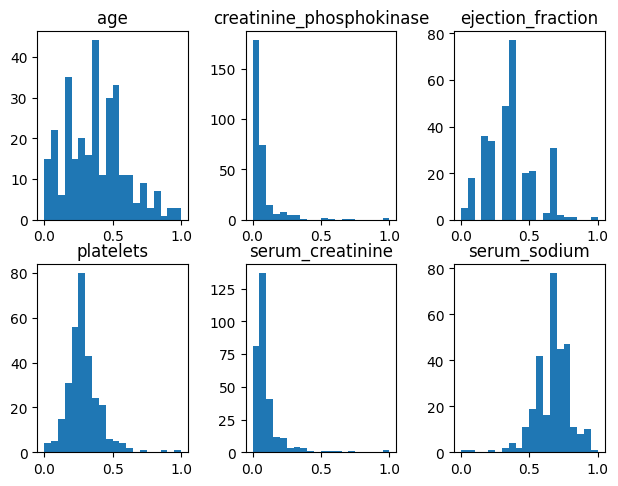

In [15]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(data_min_max_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_min_max_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_min_max_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_min_max_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_min_max_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_min_max_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

Все диапазоны находятся в пределах от 0 до 1, в сравнении с начальными данными

In [16]:
print(f'min: {min_max_scaler.data_min_}')
print(f'max: {min_max_scaler.data_max_}')

min: [4.00e+01 2.30e+01 1.40e+01 2.51e+04 5.00e-01 1.13e+02]
max: [9.500e+01 7.861e+03 8.000e+01 8.500e+05 9.400e+00 1.480e+02]


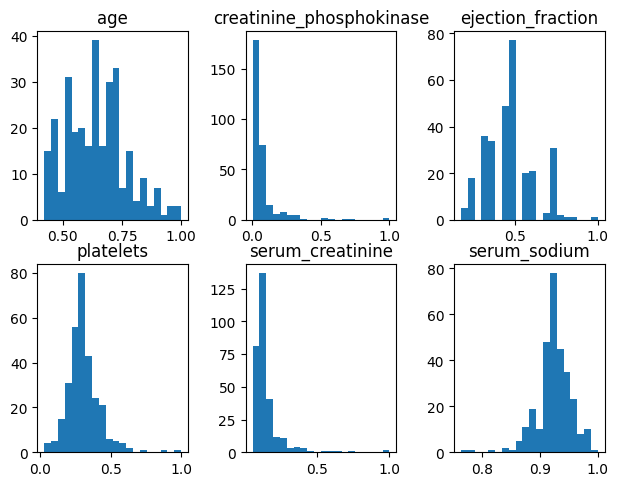

In [17]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_max_abs_scaled = max_abs_scaler.transform(data)

fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(data_max_abs_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_max_abs_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_max_abs_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_max_abs_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_max_abs_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_max_abs_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

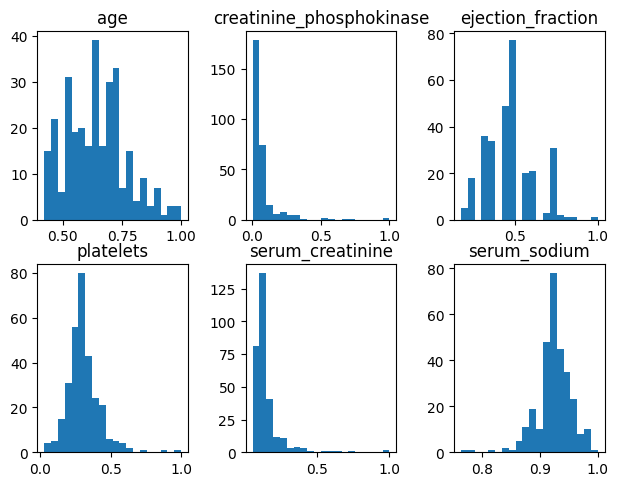

In [18]:
robust_scaler = preprocessing.RobustScaler().fit(data)
robust_scaled = max_abs_scaler.transform(data)

fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(robust_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(robust_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(robust_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(robust_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(robust_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(robust_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

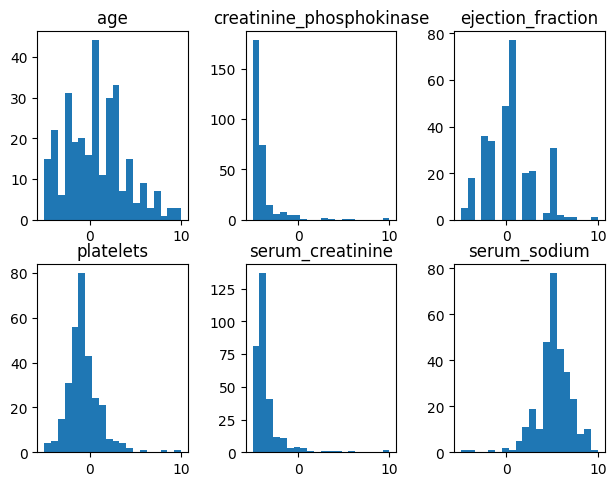

In [19]:
my_scaler = preprocessing.MinMaxScaler(feature_range=(-5, 10)).fit(data)
my_scaled = my_scaler.transform(data)

fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(my_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(my_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(my_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(my_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(my_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(my_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [20]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

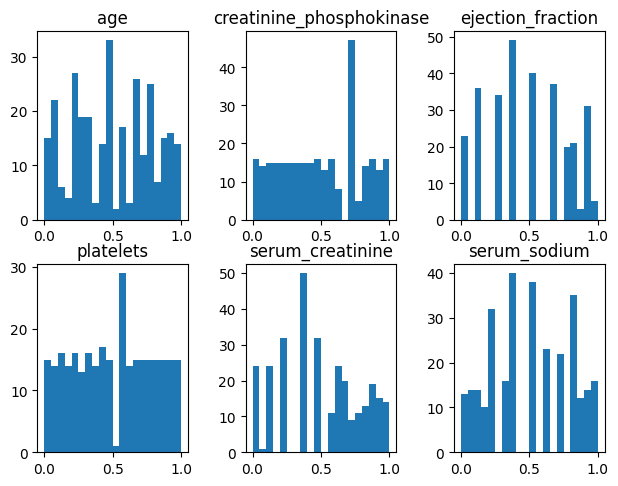

In [21]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(data_quantile_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_quantile_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_quantile_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_quantile_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_quantile_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_quantile_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

n_quantiles никак не влияет на кол-во вычисляемых квантилей

In [22]:
quantile_transformer_output = preprocessing.QuantileTransformer(n_quantiles=100, output_distribution='normal').fit(data)
data_quantile_scaled_output = quantile_transformer_output.transform(data)

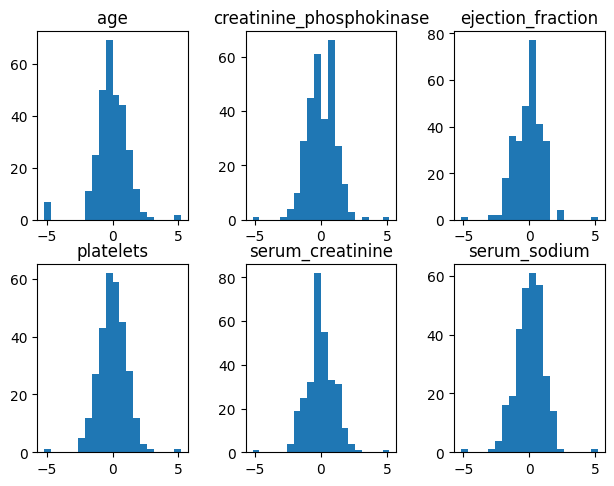

In [23]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(data_quantile_scaled_output[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_quantile_scaled_output[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_quantile_scaled_output[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_quantile_scaled_output[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_quantile_scaled_output[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_quantile_scaled_output[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [24]:
transformer_power_scale = preprocessing.PowerTransformer().fit(data)
scaled_power_scaled = transformer_power_scale.transform(data)

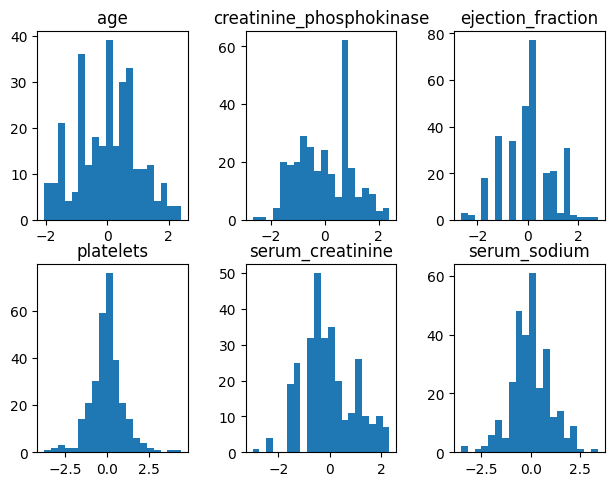

In [25]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(scaled_power_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(scaled_power_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(scaled_power_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(scaled_power_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(scaled_power_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(scaled_power_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [26]:
discretizer_scale = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal', strategy='quantile')
discretizer_scaled = discretizer_scale.fit_transform(data)

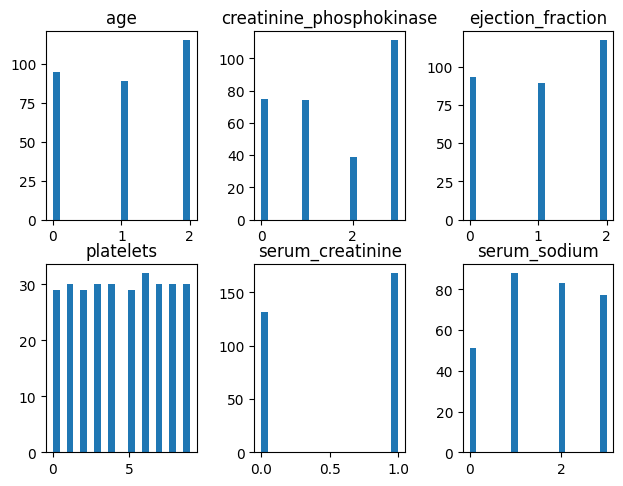

In [27]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(discretizer_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(discretizer_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(discretizer_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(discretizer_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(discretizer_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(discretizer_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()